<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<hr>

# Copernicus Sentinel-5P TROPOMI - Nitrogen Dioxide - Level 2

A precursor satellite mission, Sentinel-5P aims to fill in the data gap and provide data continuity between the retirement of the Envisat satellite and NASA's Aura mission and the launch of Sentinel-5. The Copernicus Sentinel-5P mission is being used to closely monitor the changes in air quality and was launched in October 2017.

Sentinel-5P Pre-Ops data are disseminated in the `netCDF` format and can be downloaded via the [Copernicus Open Access Hub](https://scihub.copernicus.eu/).

Sentinel-5P carries the `TROPOMI` instrument, which is a spectrometer in the UV-VIS-NIR-SWIR spectral range. `TROPOMI` provides measurements on:
* `Ozone`
* `NO`<sub>`2`</sub>
* `SO`<sub>`2`</sub>
* `Formaldehyde`
* `Aerosol`
* `Carbonmonoxide`
* `Methane`
* `Clouds`

The subsequent example introduces you to Sentinel-5P data in general and the total column of nitrogen dioxide sensed by Sentinel-5P TROPOMI in specific. Nitrogen dioxide is a good trace gas in order to monitor and track air pollution. This notebook shows elevated levels of nitrogen dioxide over cities in Malaysia, Singapore and Indonesia.


#### Module outline:
* [1 - Load and browse Sentinel-5P TROPOMI Nitrogen Dioxide Level 2 data](#load_s5p)
* [2 - Create a geographical subset](#geographical_subset)
* [3 - Visualize Sentinel-5P TROPOMI Nitrogen Dioxide Level 2 data](#visualize_s5p)

<hr>

#### Load required libraries

In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id="load_s5p"></a>Load and browse Sentinel-5P TROPOMI Nitrogen Dioxide Level 2 data

A Sentinel-5P TROPOMI Nitrogen Dioxide Level 2 file is organised in two groups: `PRODUCT` and `METADATA`. The `PRODUCT` group stores the main data fields of the product, including `latitude`, `longitude` and the variable itself. The `METADATA` group provides additional metadata items.

Sentinel-5P TROPOMI variables have, among others, the following dimensions:
* `scanline`: the number of measurements in the granule / along-track dimension index
* `ground_pixel`: the number of spectra in a measurement / across-track dimension index
* `time`: time reference for the data
* `corner`: pixel corner index
* `layer`: this dimension indicates the vertical grid of profile variables

Sentinel-5P TROPOMI data is disseminated in `netCDF`. You can load multiple `netCDF` files at once with the `open_mfdataset()` function of the xarray library. In order to load the variable as part of a Sentinel-5P data files, you have to specify the following keyword arguments: 
- `group='PRODUCT'`: to load the `PRODUCT` group
- `concat_dim='scanline'`: multiple files will be concatenated based on the scanline dimension
- `combine=nested`: combine n-dimensional grids into one along each dimension of the grid

Let us load a Sentinel-5P TROPOMI data file as `xarray.Dataset` from 15 September 2020 and inspect the data structure:

In [3]:
s5p = xr.open_mfdataset('../eodata/sentinel5p/no2/nc/2020/09/15/*', concat_dim='scanline', combine='nested', group='PRODUCT')
s5p

<xarray.Dataset>
Dimensions:                                               (scanline: 49195, ground_pixel: 450, time: 1, corner: 4, polynomial_exponents: 6, intensity_offset_polynomial_exponents: 1, layer: 34, vertices: 2)
Coordinates:
  * scanline                                              (scanline) float64 ...
  * ground_pixel                                          (ground_pixel) float64 ...
  * time                                                  (time) datetime64[ns] ...
  * corner                                                (corner) float64 0....
  * polynomial_exponents                                  (polynomial_exponents) float64 ...
  * intensity_offset_polynomial_exponents                 (intensity_offset_polynomial_exponents) float64 ...
  * layer                                                 (layer) float64 0.0...
  * vertices                                              (vertices) float64 ...
    latitude                                              (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 450), meta=np.ndarray>
    longitude                                             (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 450), meta=np.ndarray>
Data variables:
    delta_time                                            (time, scanline) datetime64[ns] dask.array<chunksize=(1, 4173), meta=np.ndarray>
    time_utc                                              (time, scanline) object dask.array<chunksize=(1, 4173), meta=np.ndarray>
    qa_value                                              (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 450), meta=np.ndarray>
    nitrogendioxide_tropospheric_column                   (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 450), meta=np.ndarray>
    nitrogendioxide_tropospheric_column_precision         (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 450), meta=np.ndarray>
    nitrogendioxide_tropospheric_column_precision_kernel  (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 450), meta=np.ndarray>
    averaging_kernel                                      (time, scanline, ground_pixel, layer) float32 dask.array<chunksize=(1, 4173, 450, 34), meta=np.ndarray>
    air_mass_factor_troposphere                           (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 450), meta=np.ndarray>
    air_mass_factor_total                                 (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 450), meta=np.ndarray>
    tm5_tropopause_layer_index                            (time, scanline, ground_pixel) float64 dask.array<chunksize=(1, 4173, 450), meta=np.ndarray>
    tm5_constant_a                                        (scanline, layer, vertices) float32 dask.array<chunksize=(4173, 34, 2), meta=np.ndarray>
    tm5_constant_b                                        (scanline, layer, vertices) float32 dask.array<chunksize=(4173, 34, 2), meta=np.ndarray>

You see that the loaded data object contains multiple dimensions and data variables, among others:
* **Dimensions**:
  * `scanline` 
  * `ground_pixel`
  * `time`
  * `corner`
  * `layer`


* **Data variables**:
  * `delta_time`: the offset of individual measurements within the granule, given in milliseconds
  * `time_utc`: valid time stamp of the data
  * `qa_value`: quality descriptor, varying between 0 (nodata) and 1 (full quality data).
  * `nitrogendioxide_tropospheric_column`: Vertically integrated NO2 column density
  * `nitrogendioxide_tropospheric_column_precision`: Standard error of the vertically integrated NO2 column

You can specify one variable of interest by putting the name of the variable into square brackets `[]` and get more detailed information about the variable. E.g. `nitrogendioxide_tropospheric_column` is the atmosphere mole content of nitrogen dioxide, has the unit `mol per m-2`, and has three dimensions, `time`, `scanline` and `groundpixel` respectively.

In [4]:
s5p_no2 = s5p['nitrogendioxide_tropospheric_column']
s5p_no2

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (time: 1, scanline: 49195, ground_pixel: 450)>
dask.array<concatenate, shape=(1, 49195, 450), dtype=float32, chunksize=(1, 4173, 450), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.17e+03 4.171e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2020-09-15
    latitude      (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 450), meta=np.ndarray>
    longitude     (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 450), meta=np.ndarray>
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Tropospheric verti...
    ancillary_variables:                                   nitrogendioxide_tr...
    multiplication_factor_to_convert_to_molecules_percm2:  6.02214e+19

You can do this for the available variables, but also for the dimensions latitude and longitude.

In [5]:
print('Latitude')
print(s5p_no2.latitude)

print('Longitude')
print(s5p_no2.longitude)

Latitude
<xarray.DataArray 'latitude' (time: 1, scanline: 49195, ground_pixel: 450)>
dask.array<concatenate, shape=(1, 49195, 450), dtype=float32, chunksize=(1, 4173, 450), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.17e+03 4.171e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
  * time          (time) datetime64[ns] 2020-09-15
    latitude      (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 450), meta=np.ndarray>
    longitude     (time, scanline, ground_pixel) float32 dask.array<chunksize=(1, 4173, 450), meta=np.ndarray>
Attributes:
    long_name:      pixel center latitude
    units:          degrees_north
    standard_name:  latitude
    valid_min:      -90.0
    valid_max:      90.0
    bounds:         /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/latitude_bounds
Longitude
<xarray.DataArray 'longitude' (time: 1, scanline: 49195, ground_pixel: 450)>
dask.array<concatenate, shape=(1, 49195

<br>

You can retrieve the array values of the variable with squared brackets: `[:,:,:]`. One single time step can be selected by specifying one value of the time dimension, e.g. `[0,:,:]`.

In [6]:
s5p_no2_0915 = s5p_no2[0,:,:]
s5p_no2_0915

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (scanline: 49195, ground_pixel: 450)>
dask.array<getitem, shape=(49195, 450), dtype=float32, chunksize=(4173, 450), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 0.0 1.0 2.0 ... 4.17e+03 4.171e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2020-09-15
    latitude      (scanline, ground_pixel) float32 dask.array<chunksize=(4173, 450), meta=np.ndarray>
    longitude     (scanline, ground_pixel) float32 dask.array<chunksize=(4173, 450), meta=np.ndarray>
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Tropospheric verti...
    ancillary_variables:                                   nitrogendioxide_tr...
    multiplication_factor_to_convert_to_molecules_percm2:  6.02214e+19

The attributes of the `xarray.DataArray` hold the entry `multiplication_factor_to_convert_to_molecules_percm2`, which is a conversion factor that has to be applied to convert the data from `mol per m`<sup>`2`</sup> to `molecules per cm`<sup>`2`</sup>.


In [7]:
conversion_factor = s5p_no2_0915.multiplication_factor_to_convert_to_molecules_percm2
conversion_factor

6.02214e+19

Additionally, you can save the attribute `longname`, which you can make use of when visualizing the data.

In [8]:
longname = s5p_no2.long_name
longname

'Tropospheric vertical column of nitrogen dioxide'

## <a id='geographical_subset'></a>Create  a geographical subset around part of Southeast Asia

You can zoom into a region by specifying a `bounding box` of interest. Let us set the extent to Malaysia, Brunei, Singapore and part of Indonesia with the following bounding box information:

In [9]:
latmin = -10.
latmax = 10.
lonmin = 95.
lonmax = 120

You can use the function [generate_geographical_subset](../functions.ipynb#generate_geographical_subset) to subset an `xarray.DataArray` based on a given bounding box.

In [10]:
s5p_no2_subset = generate_geographical_subset(xarray=s5p_no2_0915, 
                                             latmin=latmin, 
                                             latmax=latmax, 
                                             lonmin=lonmin, 
                                             lonmax=lonmax)
s5p_no2_subset

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (scanline: 840, ground_pixel: 450)>
dask.array<where, shape=(840, 450), dtype=float32, chunksize=(506, 450), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 2.165e+03 2.166e+03 ... 1.972e+03 1.973e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2020-09-15
    latitude      (scanline, ground_pixel) float32 dask.array<chunksize=(71, 450), meta=np.ndarray>
    longitude     (scanline, ground_pixel) float32 dask.array<chunksize=(71, 450), meta=np.ndarray>
Attributes:
    units:                                                 mol m-2
    standard_name:                                         troposphere_mole_c...
    long_name:                                             Tropospheric verti...
    ancillary_variables:                                   nitrogendioxide_tr...
    multiplication_factor_to_convert_to_molecules_percm2:  6.02214e+19

<br>

## <a id="plotting_s5p"></a>Plotting example - Sentinel-5P TROPOMI Nitrogen Dioxide Level 2 data

You can plot data arrays of type `numpy` with matplotlib's `pcolormesh` function. In combination with the library [cartopy](https://scitools.org.uk/cartopy/docs/latest/), you can produce high-quality maps. 

In order to make it easier to visualize the Nitrogen Dioxide values, we apply the conversion factor to the `xarray.DataArray`. This converts the Nitrogen Dioxide values from *mol per m<sup>2</sup>* to *molecules per cm<sup>2</sup>*.

In [11]:
s5p_no2_converted = s5p_no2_subset*conversion_factor
s5p_no2_converted

<xarray.DataArray 'nitrogendioxide_tropospheric_column' (scanline: 840, ground_pixel: 450)>
dask.array<mul, shape=(840, 450), dtype=float32, chunksize=(506, 450), chunktype=numpy.ndarray>
Coordinates:
  * scanline      (scanline) float64 2.165e+03 2.166e+03 ... 1.972e+03 1.973e+03
  * ground_pixel  (ground_pixel) float64 0.0 1.0 2.0 3.0 ... 447.0 448.0 449.0
    time          datetime64[ns] 2020-09-15
    latitude      (scanline, ground_pixel) float32 dask.array<chunksize=(71, 450), meta=np.ndarray>
    longitude     (scanline, ground_pixel) float32 dask.array<chunksize=(71, 450), meta=np.ndarray>

For visualization, you can use the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) to visualize the data. The following keyword arguments have to be defined:
* `data_array`
* `longitude`
* `latitude`
* `projection`
* `color palette`
* `unit`
* `long_name`
* `vmin`, 
* `vmax`
* `extent (lonmin, lonmax, latmin, latmax)`
* `set_global`

Now, let us apply the [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) function and visualize the vertically integrated nitrogen dioxide column recorded by the Sentinel-5P satellite on 15 September 2020.

Note: Multiplying the vmin and vmax values with 1e<sup>+15</sup> improves the readibility of the map legend. As vmin is already 0, there is no need to multiply it.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Tropospheric vertical column of nitrogen dioxide 2020-09-15'}>)

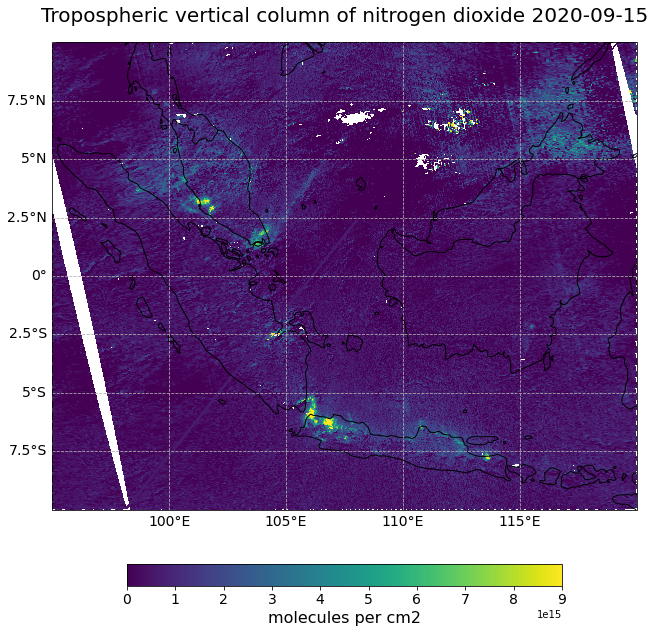

In [12]:
visualize_pcolormesh(data_array=s5p_no2_converted, 
                     longitude=s5p_no2_converted.longitude, 
                     latitude=s5p_no2_converted.latitude, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='viridis', 
                     unit='molecules per cm2', 
                     long_name=longname + ' ' + str(s5p_no2_converted.time.data)[0:10], 
                     vmin=0, 
                     vmax=9*1e+15, 
                     lonmin=lonmin, 
                     lonmax=lonmax, 
                     latmin=latmin, 
                     latmax=latmax, 
                     set_global=False)


Elevated levels of NO2 can be seen over Kuala Lumpur and Malacca in Malaysia, the city-state of Singapore and over Jakarta, Indonesia.

<br>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>